In [ ]:
# General imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
import pathlib
from zipfile import ZipFile
import PIL

import tensorflow as tf
# Specific imports
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

from glob import glob



In [ ]:
# Training and testing folders

train_path = '/content/drive/MyDrive/Colab Notebooks/Enhance IT/H6: Fruit Vegetable (LARGE ImageProcessing)/fruits_and_vegetables_filtered/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Enhance IT/H6: Fruit Vegetable (LARGE ImageProcessing)/fruits_and_vegetables_filtered/validation'

In [ ]:
# Get train and test files
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

In [ ]:
#image_files

['/content/drive/MyDrive/Colab Notebooks/Enhance IT/H6: Fruit Vegetable (LARGE ImageProcessing)/fruits_and_vegetables_filtered/train/Fruit - Banana (Bad)/106_100.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Enhance IT/H6: Fruit Vegetable (LARGE ImageProcessing)/fruits_and_vegetables_filtered/train/Fruit - Banana (Bad)/100_100.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Enhance IT/H6: Fruit Vegetable (LARGE ImageProcessing)/fruits_and_vegetables_filtered/train/Fruit - Banana (Bad)/107_100.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Enhance IT/H6: Fruit Vegetable (LARGE ImageProcessing)/fruits_and_vegetables_filtered/train/Fruit - Banana (Bad)/0_100.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Enhance IT/H6: Fruit Vegetable (LARGE ImageProcessing)/fruits_and_vegetables_filtered/train/Fruit - Banana (Bad)/101_100.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Enhance IT/H6: Fruit Vegetable (LARGE ImageProcessing)/fruits_and_vegetables_filtered/train/Fruit - Banana (Bad)/105_100.

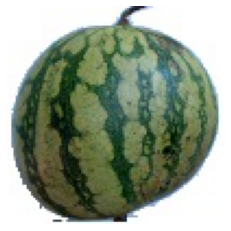

In [ ]:
# Get number of classes
folders = glob(train_path + '/*')

# Display any random image
plt.imshow(plt.imread(np.random.choice(image_files)))
plt.axis('off')
plt.show()

In [ ]:
# Resize all the images to this
IMAGE_SIZE = [100, 100]
# Training config
epochs = 30
batch_size = 20

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# Don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
ts = os.path.join(train_path)
ts = os.listdir(ts)
NumSamplesTrain = len(ts)

tn = pathlib.Path(train_path)
NumFilesTrain = len(list(tn.glob('*/*.jpg')))

print('Number of Fruts and Vegetables in Train: ', NumSamplesTrain)
print('Number of pictures in Train: ', NumFilesTrain)

Number of Fruts and Vegetables in Train:  42
Number of pictures in Train:  17428


In [ ]:
vs = os.path.join(valid_path)
vs = os.listdir(vs)
NumSamplesValid = len(vs)

vn = pathlib.Path(valid_path)
NumFilesValid = len(list(vn.glob('*/*.jpg')))

print('Number of Fruts and Vegetables in Validation: ', NumSamplesValid)
print('Number of pictures in Validation: ', NumFilesValid)

Number of Fruts and Vegetables in Validation:  42
Number of pictures in Validation:  5583


In [ ]:
# Create Model
model = Model(inputs=vgg.input, outputs=prediction)

# View structure of the model
model.summary()

# Configure model
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [ ]:
# Create an instance of ImageDataGenerator
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  rescale=1./255,  
  preprocessing_function=preprocess_input
)

# Get label mapping of class and label number
test_gen = gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

Found 5583 images belonging to 42 classes.
{'Fruit - Apple Golden': 0, 'Fruit - Apple Golden (Bad)': 1, 'Fruit - Apple Red': 2, 'Fruit - Apple Red (Bad)': 3, 'Fruit - Apricot': 4, 'Fruit - Banana': 5, 'Fruit - Banana (Bad)': 6, 'Fruit - Blueberry': 7, 'Fruit - Cantaloupe': 8, 'Fruit - Cherry': 9, 'Fruit - Chestnut': 10, 'Fruit - Clementine': 11, 'Fruit - Cocos': 12, 'Fruit - Cucumber': 13, 'Fruit - Dates': 14, 'Fruit - Grape Pink': 15, 'Fruit - Grape White': 16, 'Fruit - Guava': 17, 'Fruit - Huckleberry': 18, 'Fruit - Kiwi': 19, 'Fruit - Mandarine': 20, 'Fruit - Mango': 21, 'Fruit - Orange': 22, 'Fruit - Papaya': 23, 'Fruit - Peach': 24, 'Fruit - Pear': 25, 'Fruit - Pepino': 26, 'Fruit - Pineapple': 27, 'Fruit - Strawberry': 28, 'Fruit - Tuna': 29, 'Fruit - Watermelon': 30, 'Vegetable - Avocado': 31, 'Vegetable - Beetroot': 32, 'Vegetable - Cauliflower': 33, 'Vegetable - Corn': 34, 'Vegetable - Fig': 35, 'Vegetable - Ginger': 36, 'Vegetable - Lemon': 37, 'Vegetable - Pepper': 38, 'Vege

In [ ]:
# Create generators for training and validation
train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=False,
  batch_size=batch_size,
)
# Fit the model
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch= 150,
  validation_steps= 50,
)

Found 17428 images belonging to 42 classes.
Found 5583 images belonging to 42 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
150/150 [==============================] - 943s 6s/step - loss: 1.5631 - accuracy: 0.6057 - val_loss: 0.7323 - val_accuracy: 0.7710
Epoch 2/30
150/150 [==============================] - 681s 5s/step - loss: 0.6321 - accuracy: 0.8220 - val_loss: 0.6050 - val_accuracy: 0.7690
Epoch 3/30
150/150 [==============================] - 614s 4s/step - loss: 0.4137 - accuracy: 0.8800 - val_loss: 0.4346 - val_accuracy: 0.8590
Epoch 4/30
150/150 [==============================] - 503s 3s/step - loss: 0.3267 - accuracy: 0.8973 - val_loss: 0.3525 - val_accuracy: 0.8760
Epoch 5/30
150/150 [==============================] - 466s 3s/step - loss: 0.2691 - accuracy: 0.9173 - val_loss: 0.2669 - val_accuracy: 0.9240
Epoch 6/30
150/150 [==============================] - 438s 3s/step - loss: 0.2188 - accuracy: 0.9303 - val_loss: 0.2523 - val_accuracy: 0.9020
Epoch 7/30
150/150 [==============================] - 419s 3s/step - loss: 0.1978 - accuracy: 0.9364 - val_loss: 0.1957 - val_accuracy: 0.9350

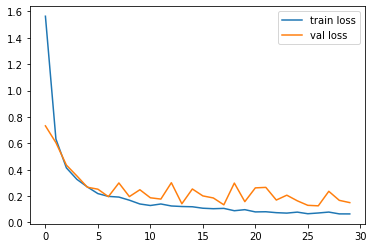

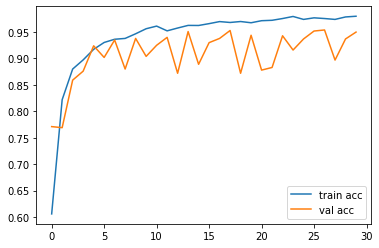

In [ ]:
# Plot the train and validation loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Plot the train and validation accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
print("Final training accuracy = {}".format(r.history["accuracy"][-1]))
print("Final validation accuracy = {}".format(r.history["val_accuracy"][-1]))

Final training accuracy = 0.9800000190734863
Final validation accuracy = 0.949999988079071


In [ ]:
# Visualizing predictions
result = np.round(model.predict_generator(valid_generator))
result


In [ ]:
print (result.shape)

(5583, 42)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, image

def prediction(file):

  img = image.load_img(file, target_size = (IMAGE_SIZE))
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)

  probs = model.predict(img)
  print(probs)

  max = 0
  for i in probs:
    for j in i:
      if max <= j:
        max = j
  print('Max Value: ', max)

  position = 0
  for i in probs:
    for j in i:
      if j == max:
        break
      else:
        position += 1
  print('Position: ', position)

  pic = plt.imread(file)
  plt.imshow(pic)
  plt.show()

  print('The prediction is: ',labels[position], '!!!!')

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Max Value:  1.0
Position:  30


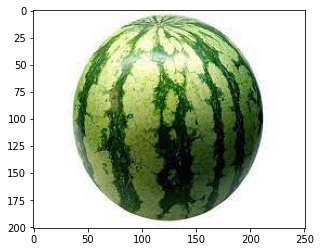

The prediction is:  Fruit - Watermelon !!!!


In [ ]:
prediction('/content/drive/MyDrive/Colab Notebooks/Enhance IT/H6: Fruit Vegetable (LARGE ImageProcessing)/Sandia.jpg')

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Max Value:  1.0
Position:  33


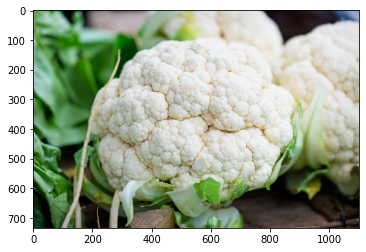

The prediction is:  Vegetable - Cauliflower !!!!


In [ ]:
prediction('/content/drive/MyDrive/Colab Notebooks/Enhance IT/H6: Fruit Vegetable (LARGE ImageProcessing)/Coliflower.jpg')

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Max Value:  1.0
Position:  5


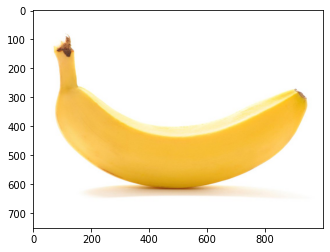

The prediction is:  Fruit - Banana !!!!


In [ ]:
prediction('/content/drive/MyDrive/Colab Notebooks/Enhance IT/H6: Fruit Vegetable (LARGE ImageProcessing)/Banana.jpg')

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Max Value:  1.0
Position:  2


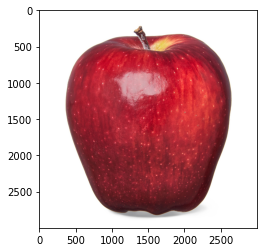

The prediction is:  Fruit - Apple Red !!!!


In [ ]:
prediction('/content/drive/MyDrive/Colab Notebooks/Enhance IT/H6: Fruit Vegetable (LARGE ImageProcessing)/Apple Red.jpeg')

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.4686693e-24
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00 0.0000000e+00 0.0000000e+00 1.8773117e-15 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
Max Value:  1.0
Position:  30


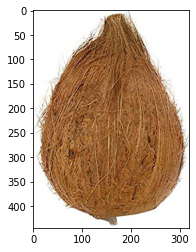

The prediction is:  Fruit - Watermelon !!!!


In [ ]:
prediction('/content/drive/MyDrive/Colab Notebooks/Enhance IT/H6: Fruit Vegetable (LARGE ImageProcessing)/cocos.jpg')